## Extract The Data 
---

In [ ]:
!pwd

/content


In [ ]:
!unrar x "/content/drive/MyDrive/cv_project/Data/Fall 21 Vision Project.rar" "/content/drive/MyDrive/cv_project/Data/"

Streaming output truncated to the last 5000 lines.
Extracting  /content/drive/MyDrive/cv_project/Data/Fall 21 Vision Project/training_data/image_02/0004/000169.png      19%  OK 
Extracting  /content/drive/MyDrive/cv_project/Data/Fall 21 Vision Project/training_data/image_02/0004/000170.png      19%  OK 
Extracting  /content/drive/MyDrive/cv_project/Data/Fall 21 Vision Project/training_data/image_02/0004/000171.png      19%  OK 
Extracting  /content/drive/MyDrive/cv_project/Data/Fall 21 Vision Project/training_data/image_02/0004/000172.png      19%  OK 
Extracting  /content/drive/MyDrive/cv_project/Data/Fall 21 Vision Project/training_data/image_02/0004/000173.png      19%  OK 
Extracting  /content/drive/MyDrive/cv_project/Data/Fall 21 Vision Project/training_data/image_02/0004/000174.png      19%  OK 
Extracting  /content/drive/MyDrive/cv_project/Data/Fall 21 Vision Project/training_data/image_02/0004/000175.png      19%  O

## Data Preprocessing
---

In [ ]:
%cd /content/drive/MyDrive/cv_project

/content/drive/MyDrive/cv_project


**-Creating working directories for model and data<Br>
-Split data for detection phase and tracking phase**

In [ ]:
import shutil
import os
import cv2

In [ ]:
data_path = '/content/drive/MyDrive/cv_project/Data/'
model_path = '/content/drive/MyDrive/cv_project/Yolov5_DeepSort_Pytorch/'

In [ ]:
#data_path = '/content/drive/MyDrive/cv_project/Data/'
#os.mkdir(data_path + 'det')
#os.mkdir(data_path + 'track')
#os.mkdir(data_path + '/det/images')
#os.mkdir(data_path +'/track/images')
#os.mkdir(data_path + '/det/annotations')


In [ ]:
#shutil.copytree(data_path+ 'vision_data/training_data/image_02/0018', data_path +'track/images/seq1')
#shutil.copytree(data_path+ 'vision_data/training_data/image_02/0017', data_path +'track/images/seq2')

'/content/drive/MyDrive/cv_project/Data/track/images/seq2'

In [ ]:
def moving_images():
  path = '/content/drive/MyDrive/cv_project/Data/vision_data/training_data/image_02/'
  dst_path = '/content/drive/MyDrive/cv_project/Data/det/images/'
  dir_names = os.listdir(path)
  for dir_name in dir_names:
    if os.path.isdir(path+dir_name):
      file_names = os.listdir(path+dir_name)
      for file_name in file_names:
        new_name = file_name.split('.')[0]+'_'+dir_name+'.png'
        shutil.move(path+dir_name+'/'+file_name,dst_path+new_name)


In [ ]:
moving_images()

**Make large csv file containing the whole annotations**

In [ ]:
import pandas as pd
column_names = ['frame', 'track_id', 'type', 'truncated', 'occluded', 'alpha', 'left', 'top', 'right', 'bottom', 'dim1', 'dim2', 'dim3', 'loc1', 'loc2', 'loc3', 'rot_y', 'score']

In [ ]:
def change_frame_name(name,dir_name):
  return str(name).zfill(6)+'_'+dir_name.split('.')[0]+'.png'

def concat_anott(path):
  file_names = os.listdir(path)
  df = pd.read_csv(path+'/0000.txt', sep = ' ', names = column_names)
  df['frame'] = df.apply(lambda x: change_frame_name(x['frame'], '0000.txt'), axis=1)
  for name in file_names:
    if name == '0000.txt':
      continue
    temp_df = pd.read_csv(path + '/'+name, sep = ' ', names = column_names)
    temp_df['frame'] = temp_df.apply(lambda x: change_frame_name(x['frame'], name), axis=1)
    df = pd.concat([df, temp_df], ignore_index=True)
  return df

In [ ]:
df = concat_anott(data_path+ 'vision_data/training_data/label_02')

In [ ]:
df.shape

(45213, 18)

In [ ]:
df.head()

frame  track_id        type  ...       loc3     rot_y  score
0  000000_0000.png        -1    DontCare  ...  -1.000000 -1.000000    NaN
1  000000_0000.png        -1    DontCare  ...  -1.000000 -1.000000    NaN
2  000000_0000.png         0         Van  ...  13.410495 -2.115488    NaN
3  000000_0000.png         1     Cyclist  ...   5.776261 -1.675458    NaN
4  000000_0000.png         2  Pedestrian  ...   8.455685 -1.900245    NaN

[5 rows x 18 columns]

In [ ]:
df.to_csv(data_path+'labels.csv')

**Select only required classes for training the detector**

In [ ]:
df['type'].unique()

array(['DontCare', 'Van', 'Cyclist', 'Pedestrian', 'Car', 'Truck', 'Misc',
       'Tram', 'Person'], dtype=object)

In [ ]:
filter = (df['type']== 'Car') |( df['type']=='Pedestrian')
df[filter]

frame  track_id        type  ...       loc3     rot_y  score
4      000000_0000.png         2  Pedestrian  ...   8.455685 -1.900245    NaN
9      000001_0000.png         2  Pedestrian  ...   8.156156 -1.886840    NaN
14     000002_0000.png         2  Pedestrian  ...   7.859055 -1.873436    NaN
19     000003_0000.png         2  Pedestrian  ...   7.560739 -1.860031    NaN
24     000004_0000.png         2  Pedestrian  ...   7.267796 -1.846627    NaN
...                ...       ...         ...  ...        ...       ...    ...
45208  000208_0016.png        12  Pedestrian  ...  29.970841 -2.067907    NaN
45209  000208_0016.png        15  Pedestrian  ...  15.306737  1.550852    NaN
45210  000208_0016.png        16  Pedestrian  ...  15.271123  1.536202    NaN
45211  000208_0016.png        17  Pedestrian  ...   7.831497 -2.535098    NaN
45212  000208_0016.png        18  Pedestrian  ...  38.374379  1.538058    NaN

[26258 rows x 18 columns]

**Converting data to yolo format and creating annotation file for every frame**

In [ ]:
sizes_array =[]
for i in range(19):
  path = data_path +'det/images/000000_00'+str(i).zfill(2)+'.png'
  size = cv2.imread(path).shape
  sizes_array.append(size)
  print(f'vid {i} shape {size}')

vid 0 shape (375, 1242, 3)
vid 1 shape (375, 1242, 3)
vid 2 shape (375, 1242, 3)
vid 3 shape (375, 1242, 3)
vid 4 shape (375, 1242, 3)
vid 5 shape (375, 1242, 3)
vid 6 shape (375, 1242, 3)
vid 7 shape (375, 1242, 3)
vid 8 shape (375, 1242, 3)
vid 9 shape (375, 1242, 3)
vid 10 shape (375, 1242, 3)
vid 11 shape (375, 1242, 3)
vid 12 shape (375, 1242, 3)
vid 13 shape (375, 1242, 3)
vid 14 shape (370, 1224, 3)
vid 15 shape (370, 1224, 3)
vid 16 shape (370, 1224, 3)
vid 17 shape (370, 1224, 3)
vid 18 shape (374, 1238, 3)


In [ ]:
def from_csv_to_dict(df):
    whole_info_dict = {}
    for index, row in df.iterrows():
        file_name = row['frame']
        if file_name in whole_info_dict:
            xmin, ymin, xmax, ymax = row['left'], row['top'], row['right'], row['bottom']
            whole_info_dict[file_name]['bboxes'].append({'class': row['type'], 'xmin': xmin, 'ymin': ymin, 'xmax': xmax, 'ymax': ymax})
        else:
            
            xmin, ymin, xmax, ymax = row['left'], row['top'], row['right'], row['bottom']
            whole_info_dict[file_name]=dict()
            whole_info_dict[file_name]['bboxes'] = [{'class': row['type'], 'xmin': xmin, 'ymin': ymin, 'xmax': xmax, 'ymax': ymax}]
            size = (1242,375,3)
            (height, width, depth ) = sizes_array[int(file_name[9:-4])]
            whole_info_dict[file_name]['image_size'] = (width, height, depth)
            whole_info_dict[file_name]['filename'] = file_name
    return list(whole_info_dict.values())

In [ ]:
#Dictionary that maps class names to IDs
class_name_to_id_mapping = {"Car": 0,
                           "Pedestrian": 1}

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join("/content/drive/MyDrive/cv_project/Data/det/annotations", info_dict["filename"].replace("png", "txt"))
    
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [ ]:
annotation = from_csv_to_dict(df[filter])

In [ ]:
annotation[0]

{'bboxes': [{'class': 'Pedestrian',
   'xmax': 1204.470628,
   'xmin': 1106.137292,
   'ymax': 323.876144,
   'ymin': 166.576807}],
 'filename': '000000_0000.png',
 'image_size': (1242, 375, 3)}

In [ ]:
!ls /content/drive/MyDrive/cv_project/Data/det/annotations

In [ ]:
for ann in annotation:
  convert_to_yolov5(ann)
annotations = [os.path.join(data_path + 'det/annotations', x) for x in os.listdir(data_path+'det/annotations') if x[-3:] == "txt"]

**Creating empty annotations for emtpy frame**

In [ ]:
len(df['frame'].unique()) #showing number of labeled images

6028

In [ ]:
object_frames = df[filter]['frame'].unique() #showing number of car & pedestrain label
print(len(object_frames))

5269


In [ ]:
unlabeled_images = set(os.listdir(data_path +'det/images'))-set(object_frames)
print(len(unlabeled_images))

843


In [ ]:
for empty_frame in unlabeled_images:
  save_file_name = os.path.join("/content/drive/MyDrive/cv_project/Data/det/annotations", empty_frame.replace("png", "txt"))
  with open(save_file_name, 'w') as fp:
    pass

**Assuring data in the right format and split it to train and val**

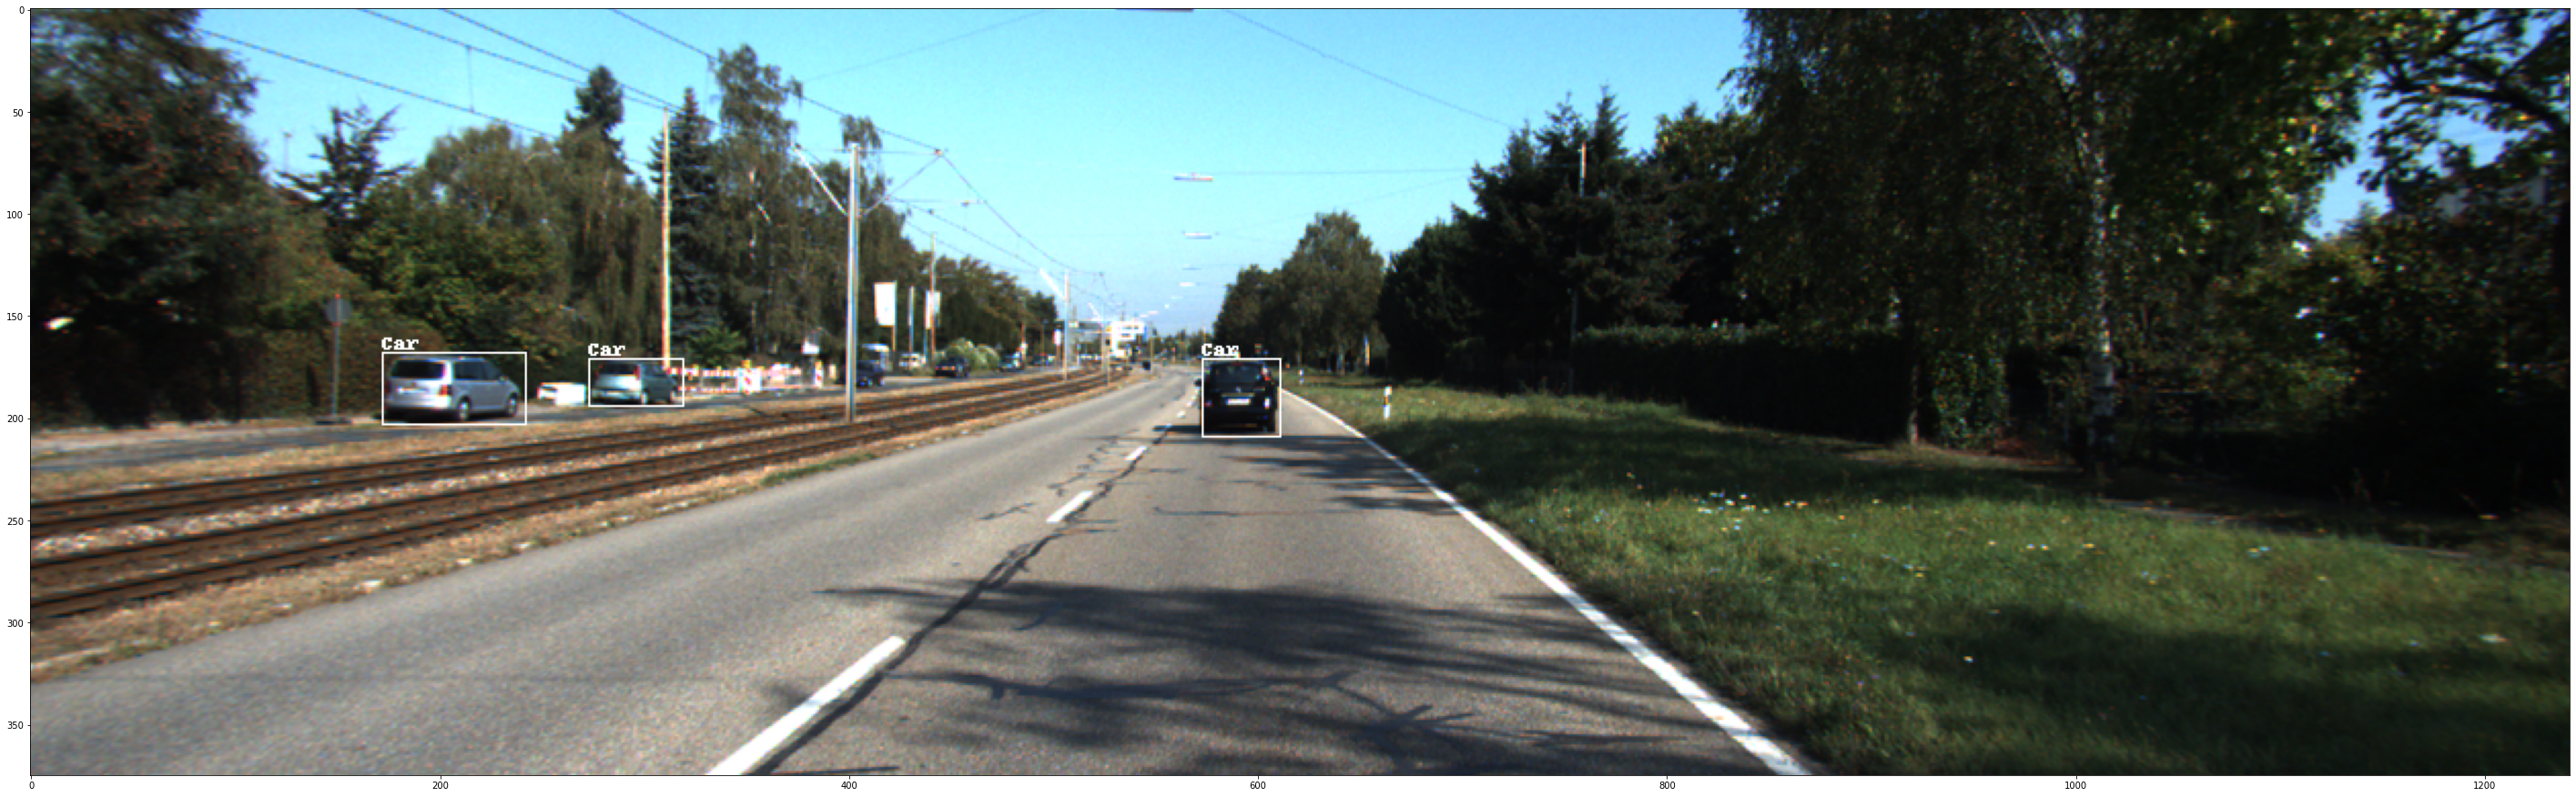

In [ ]:
import random
import numpy as np
from IPython.display import Image
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,30)
random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace(data_path+"det/annotations", data_path+"det/images").replace("txt", "png")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [ ]:
from sklearn.model_selection import train_test_split
images = [os.path.join(data_path+'det/images', x) for x in os.listdir(data_path+'det/images')]
annotations = [os.path.join(data_path+'det/annotations', x) for x in os.listdir(data_path+'det/annotations') if x[-3:] == "txt"]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)

In [ ]:
%cd /content/drive/MyDrive/cv_project/Data/det

/content/drive/MyDrive/cv_project/Data/det


In [ ]:
!mkdir images/train images/val  annotations/train annotations/val 

In [ ]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

move_files_to_folder(train_images, 'images/train')
move_files_to_folder(val_images, 'images/val/')
move_files_to_folder(train_annotations, 'annotations/train/')
move_files_to_folder(val_annotations, 'annotations/val/')

In [ ]:
!ls images/train | wc -l
!ls images/val |wc -l

4889
1223


In [ ]:
!ls annotations/train | wc -l
!ls annotations/val |wc -l

4889
1223


## Training YoloV5
---

**Configure Yolov5 manually**

In [1]:
%cd /content/drive/MyDrive/cv_project/Yolov5_DeepSort_Pytorch/yolov5

/content/drive/MyDrive/cv_project/Yolov5_DeepSort_Pytorch/yolov5


In [2]:
import glob
path_valid = glob.glob('/content/drive/MyDrive/cv_project/Data/det/images/val/*')
path_valid[0]

'/content/drive/MyDrive/cv_project/Data/det/images/val/000708_0009.png'

**Installing requirements**

In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 596 kB 5.4 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


**Train YoloV5**

In [ ]:
!ls

CONTRIBUTING.md  hubconf.py   README.md		tutorial.ipynb	yolov5s.pt
data		 LICENSE      requirements.txt	utils
detect.py	 mine	      runs		val.py
Dockerfile	 models       setup.cfg		vid_4_1040.jpg
export.py	 __pycache__  train.py		vid_4_2100.jpg


In [ ]:
!python train.py --img 1242 --weights mine/ --cfg yolov5s.yaml --hyp hyp.scratch.yaml --batch 16 --epochs 100 --data Kitti.yaml --patience 20  --workers 24 --freeze 0 --name yolo_kitti_detector

train: weights=mine/, cfg=yolov5s.yaml, data=Kitti.yaml, hyp=hyp.scratch.yaml, epochs=100, batch_size=16, imgsz=1242, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=24, project=runs/train, name=yolo_kitti_detector, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=20, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 29 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.0-122-gd885799 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, h

In [ ]:
!python train.py  --img 1242 --weights mine/ --cfg yolov5s.yaml --hyp hyp.scratch.yaml --batch 16 --epochs 30 --data Kitti.yaml --patience 5  --workers 24 --freeze 0 --resume --name yolo_kitti_detector

train: weights=mine/, cfg=yolov5s.yaml, data=Kitti.yaml, hyp=hyp.scratch.yaml, epochs=30, batch_size=16, imgsz=1242, rect=False, resume=True, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=24, project=runs/train, name=yolo_kitti_detector, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=5, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 29 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
Resuming training from ./runs/train/yolo_kitti_detector4/weights/last.pt
YOLOv5 🚀 2021-12-12 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0

In [ ]:
!python train.py  --img 1242 --weights runs/train/yolo_kitti_detector4/weights/best.pt --cfg yolov5s.yaml --hyp hyp.scratch.yaml --batch 16 --epochs 30 --data Kitti.yaml --patience 5  --workers 24 --freeze 0  --name yolo_kitti_detector4_v1

train: weights=runs/train/yolo_kitti_detector4/weights/best.pt, cfg=yolov5s.yaml, data=Kitti.yaml, hyp=hyp.scratch.yaml, epochs=30, batch_size=16, imgsz=1242, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=24, project=runs/train, name=yolo_kitti_detector4_v1, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=5, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 29 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 2021-12-12 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou

In [5]:
!python train.py  --img 1242 --weights runs/train/yolo_kitti_detector4_v1/weights/last.pt --cfg yolov5s.yaml --hyp hyp.scratch.yaml --batch 16 --epochs 30 --data Kitti.yaml --patience 5  --workers 24 --freeze 0  --resume --name yolo_kitti_detector4_v1

train: weights=runs/train/yolo_kitti_detector4_v1/weights/last.pt, cfg=yolov5s.yaml, data=Kitti.yaml, hyp=hyp.scratch.yaml, epochs=30, batch_size=16, imgsz=1242, rect=False, resume=True, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=24, project=runs/train, name=yolo_kitti_detector4_v1, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=5, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (49/49), done.
remote: Total 71 (delta 49), reused 49 (delta 49), pack-reused 22
github: Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds
Unpacking objects: 100% (71/71), done.
Resuming training from ./runs/train/yolo_kitti_detector4_v1/weights/last.pt
YOLOv5 🚀 v6.0-122-gd8857